In [1]:
# These are the stim times for calcium traces (different from stim times for whole video)
import pandas as pd
import numpy as np
fps = 15.49/3
stim_times = pd.read_csv("stim_times_calcium_traces.csv")
stim_times = stim_times.drop(columns = "Unnamed: 0")
#print(stim_times) 

In [2]:
traces_all = pd.read_csv("calcium_traces_all.csv")
traces_all = traces_all.drop(columns = "Unnamed: 0")
#print(traces_all)

In [3]:
traces_stimulus = pd.read_csv("traces_stimulus_intervals_all.csv")
traces_stimulus = traces_stimulus.drop(columns = "Unnamed: 0")
#print(traces_stimulus)


In [4]:
traces_stimulus_reordered = pd.read_csv("traces_stimulus_reordered_all.csv")
traces_stimulus_reordered = traces_stimulus_reordered.drop(columns = 'Unnamed: 0')
#print(traces_stimulus_reordered)

In [5]:
traces_average = pd.read_csv("traces_average_batch1.csv", index_col = False)
traces_average = traces_average.drop(columns = 'Unnamed: 0')
#print(traces_average)

traces_normalized = pd.read_csv("traces_normalized_batch1.csv")
traces_normalized = traces_normalized.drop(columns = 'Unnamed: 0')
#print(traces_normalized)

traces_average_normalized = pd.read_csv("traces_average_normalized_batch1.csv")
traces_average_normalized = traces_average_normalized.drop(columns = 'Unnamed: 0')
#print(traces_average_normalized)

traces_normalized_ratio = pd.read_csv("traces_normalized_ratio_batch1.csv")
traces_normalized_ratio = traces_normalized_ratio.drop(columns = 'Unnamed: 0')
#print(traces_normalized_ratio)

traces_average_normalized_ratio = pd.read_csv("traces_average_normalized_ratio_batch1.csv")
traces_average_normalized_ratio = traces_average_normalized_ratio.drop(columns = 'Unnamed: 0')
#print(traces_average_normalized_ratio)

In [6]:
# all neurons from s1, s2, s3 put together on columns 
# not in chronological order, 10 of shock, 10 of shockCTRL, etc.
def animal_none(animall):

    s1 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    animal['stimulus'] = pd.Series(stim)
    
    return animal

# subtracting baseline for each trial - NOT in chronological order
def animal_normalized(animall):

    s1 = traces_normalized[traces_normalized['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_normalized[traces_normalized['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_normalized[traces_normalized['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    animal['stimulus'] = pd.Series(stim)
    
    return animal

# all neurons put together with whole calcium traces (NOT cut to intervals of stimuli)
def animal_all(animall):

    s1 = traces_all[traces_all['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_all[traces_all['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_all[traces_all['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    
    return animal
print(animal_none(6))




              0.s1          1.s1          2.s1          3.s1          4.s1  \
0      4139.891010  21375.943542   9246.683028   9662.989151   5067.592792   
1      4136.599925  19781.570135   8824.421407   8755.960055   5531.220335   
2      4133.741229  21519.408885   8463.135749   8629.330099   5266.920116   
3      4131.258273  19910.529360   8154.021258   7835.784726   5028.273379   
4      4129.101130  18464.328833   7889.544771   7129.361088   4812.789193   
...            ...           ...           ...           ...           ...   
3565  12542.576782  15903.694565  12356.763184  11560.296122  11086.806504   
3566  11865.118384  14862.636589  11485.392516  10444.964855  10283.281871   
3567  10846.832531  13926.842029  10739.851218  13688.322634   9557.747801   
3568   9962.335687  13085.669854  10101.969687  13728.691869  11545.268361   
3569   9194.050009  12329.551404   9556.200236  14695.050681  10697.246197   

              5.s1          6.s1         7.s1          8.s1    

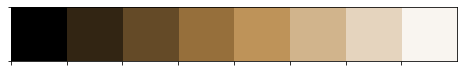

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import colorsys
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def adjust_lightness(color, amount):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])
import seaborn as sns
rgbs = [adjust_lightness(mc.ColorConverter.to_rgb("tan"), scale) for scale in [0, 0.2, 0.4,0.6,0.8,1,1.2,1.4]]
sns.palplot(rgbs)

In [8]:
# k should be 4 (Christian)
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, permutation_test_score
from scipy.stats import pearsonr
import random
def my_kfold_plsr(X_model, y, k, n_components):
    
    kf = KFold(n_splits = k, random_state = 1, shuffle = True)
    kf.get_n_splits(X_model)
    r_repeated = []
    for train_index, test_index in kf.split(X_model):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_model[train_index], X_model[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pls = PLSRegression(n_components=n_components) 
        pls.fit(X_train,y_train)
        y_predicted = pls.predict(X_test)
        r,_ = pearsonr(y_predicted.flatten(),y_test.flatten())
        r_repeated.append(r)
    r_repeated = [x for x in r_repeated if str(x) != 'nan' and x != np.nan]
    # dropping nan values from r_repeated - happends when an input of pearson r is a constant array
    if(len(r_repeated) > 0):
        r_averaged = sum(r_repeated)/len(r_repeated)
    else:
        r_averaged = np.nan
    
    return r_averaged, r_repeated

def my_kfold_plsr_weights(X_model, y, k, n_components):
    
    kf = KFold(n_splits = k, random_state = 1, shuffle = True)
    weights_0 = []
    weights_1 = []
    weights_2 = []
    kf.get_n_splits(X_model)
    r_repeated = []
    for train_index, test_index in kf.split(X_model):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_model[train_index], X_model[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pls = PLSRegression(n_components=n_components) 
        pls.fit(X_train,y_train)
        y_predicted = pls.predict(X_test)
        r,_ = pearsonr(y_predicted.flatten(),y_test.flatten())
        r_repeated.append(r)
        w = pls.x_weights_
        weights_0 = weights_0 + w[:,0].tolist()
        weights_1 = weights_0 + w[:,1].tolist()
        weights_2 = weights_0 + w[:,2].tolist()
    r_repeated = [x for x in r_repeated if str(x) != 'nan' and x != np.nan]
    # dropping nan values from r_repeated - happends when an input of pearson r is a constant array
    if(len(r_repeated) > 0):
        r_averaged = sum(r_repeated)/len(r_repeated)
    else:
        r_averaged = np.nan
    print(len(weights_0))
    
    return weights_0,weights_1,weights_2



def my_permutation_plsr(X_model, y, k, n_components, n_permutations):
    
    r_averaged,_ = my_kfold_plsr(X_model,y,k,n_components)
    
    r_permuted = []
    y_list = y.flatten().tolist()
    for permut in range(0,n_permutations):
        
        random.shuffle(y_list)
        y_perm = np.asarray(y_list)
        y_perm = y_perm.reshape((len(y_list),1))
        
        r,_ = my_kfold_plsr(X_model,y_perm,k,n_components)
        
        if(r_averaged != np.nan):
            r_permuted.append(r)
        
    #Calculating p value
    bad = [i for i in r_permuted if i >= r_averaged]
    p = len(bad)/len(r_permuted) 
    return r_permuted, p
  

In [9]:
# preparing similarity index (reordered like the neural activity) 10 shock, 10 shock CTRL...10 laserCTRL, squeak, squeak CTRL
#Doing var2 here - zeroed or non zeroed
pd.options.display.float_format = "{:,.6f}".format
sec = 5
fps = 15.49/3
frames_interval = int(sec * fps)
total_frames = 2 * frames_interval + 1
#frames interval is 25, total frames is 51
def similarity_index_trials(animall, var):
    similarity = pd.read_csv('similarity_index_facial_expressions_var2_' + str(var) + '_animal' + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("list_start" + str(animall) + ".csv", index_col = 0)
    #print(similarity)
    temp = pd.DataFrame.copy(similarity, deep = True)
    #these are stimulus times for neural activiy
    #print(list_start)
    keeping = []
    for row in list_start.index:
        for col in list_start.columns:
            for add in range(-frames_interval,frames_interval+1):
                keeping.append(list_start.at[row,col]+add)
    dropping = list(set(temp.index).difference(keeping))
    temp = temp.drop(temp.index[dropping], inplace = False)
    #print(temp)
    indices = pd.DataFrame(data = temp.index, columns = ['index'])
    temp = temp.reset_index(drop = True)
    temp['stimulus'] = pd.Series(dtype = str)
    #z = 0
    #for stim in times['stimulus']:
    ##    for add in range(0,total_frames):
    #        temp.at[z,'stimulus'] = stim
    #        z = z + 1
 

    similarity_stimulus = pd.DataFrame.copy(temp, deep = True)
    similarity_stimulus = pd.concat([similarity_stimulus,indices], axis = 1)
    #print(similarity_stimulus)
    
    similarity_stimulus_reordered = pd.DataFrame(columns = similarity_stimulus.columns)
    for stim in ['shock','shockCTRL','laserHI','laserLO','laserCTRL','squeak','squeakCTRL']:
        times = list_start.loc[:,stim].tolist()
        temp = pd.DataFrame.copy(similarity_stimulus, deep = True)
            
        # ind is all indices (in dataframe of that animal and plane) for a particular stimulus
        ind = []
        z = 0
        for val in times:
            for add in range(-frames_interval,frames_interval+1):
                z = z + 1
                ind.append(temp.index[temp['index'] == val+add].tolist()[0])
        dropping = list(set(temp.index).difference(ind))
        temp = temp.drop(temp.index[dropping], inplace = False)
        temp['stimulus']=pd.Series(dtype= str)
        temp['stimulus']=stim
        similarity_stimulus_reordered = pd.concat([similarity_stimulus_reordered,temp], ignore_index = True)
    
    #print(similarity_stimulus_reordered)
    
    similarity_stimulus = similarity_stimulus.drop(columns = "index")
    similarity_stimulus_reordered = similarity_stimulus_reordered.drop(columns = "index")
    
    return similarity_stimulus_reordered
    


  
similarity_index_trials(11, "nonzeroed")
    

,laserHI,laserLO,laserCTRL,shock,shockCTRL,squeak,squeakCTRL,baseline,stimulus
0,-0.000405,-0.000477,-0.000408,0.000084,0.000013,-0.000359,-0.000270,0.999847,shock
1,-0.000388,-0.000458,-0.000392,0.000084,0.000017,-0.000344,-0.000257,0.999854,shock
2,-0.000416,-0.000489,-0.000414,0.000077,0.000009,-0.000360,-0.000272,0.999842,shock
3,-0.000480,-0.000559,-0.000481,0.000088,0.000004,-0.000415,-0.000319,0.999815,shock
4,-0.000422,-0.000490,-0.000418,0.000083,0.000014,-0.000372,-0.000297,0.999827,shock
...,...,...,...,...,...,...,...,...,...
3565,-0.001064,-0.001194,-0.001198,0.000175,-0.000306,-0.001220,-0.000948,0.999433,squeakCTRL
3566,-0.001039,-0.001166,-0.001170,0.000183,-0.000287,-0.001183,-0.000917,0.999453,squeakCTRL
3567,-0.000982,-0.001105,-0.001106,0.000198,-0.000253,-0.001117,-0.000862,0.999495,squeakCTRL
3568,-0.000967,-0.001095,-0.001088,0.000202,-0.000249,-0.001103,-0.000844,0.999511,squeakCTRL


In [48]:
pd.options.display.float_format = "{:,.5f}".format
def PLSR_behavioral_time_resolved_similarity_index(animall, typee, stimulus, n_comp_max, k, n_permutations, var):
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Standardization happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    similarity = similarity_index_trials(animall, var)
    similarity = similarity[similarity["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    similarity = similarity[stimulus]
    #replacing missing values with those close by
    for ind in similarity.index:
        if(ind in similarity[similarity.isna().isin([True])].index):
            if(similarity.iat[ind-1] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind-1]
            elif(similarity.iat[ind] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind+1]
            elif(similarity.iat[ind-2] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind-2]
            elif(similarity.iat[ind+2] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind+2]
            elif(similarity.iat[ind-3] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind-3]
            elif(similarity.iat[ind+3] != np.nan):
                   similarity.iat[ind] = similarity.iat[ind+3]
    
    X_model = np.array(animal_scaled.drop(columns = ["stimulus"]))
    #Making y array to fit [0,1] or NOT?
    #similarity = (similarity-min(similarity.loc[:].tolist()))/(max(similarity.loc[:].tolist())-min(similarity.loc[:].tolist()))
    animal_scaled.to_csv("presentation_X_timeresolvedPLSR.csv")
    y = np.array(similarity)
    similarity.to_csv("presentation_y_timeresolvedPLSR.csv")
    y = y.reshape((2550,1))
    
    r_values = []
    p_values = []
    for comp in range(1,n_comp_max+1):
        print(comp)
        r_averaged, _ = my_kfold_plsr(X_model, y, k, comp)
        r_values.append(r_averaged)
    
        _, p = my_permutation_plsr(X_model, y, k, comp, n_permutations)
        p_values.append(p)
        
    compp = 3
    pls = PLSRegression(n_components=compp) 
    pls.fit(X_model,y)
    loadings = pls.x_loadings_ 
    LX = np.dot(X_model,loadings)
        
    return r_values, p_values, LX
    
    
PLSR_behavioral_time_resolved_similarity_index(11, "none", "laserHI", 4, 4, 100, 'nonzeroed')



1
2
3
4


([0.6796703382623285,
  0.8322363694029095,
  0.8746329377917221,
  0.9059703015905887],
 [0.0, 0.0, 0.0, 0.0],
 array([[-15.15164597,  -5.05603551,   4.93372129],
        [-15.02870103,  -5.18982543,   4.55401428],
        [-14.64557115,  -5.0277525 ,   4.17937569],
        ...,
        [  3.0918498 ,  -1.45516743,  -6.3195962 ],
        [  2.97779401,  -1.81198071,  -6.62318365],
        [  3.05102196,  -1.73927224,  -6.35150181]]))

VAR  zeroed
1
2
3
4


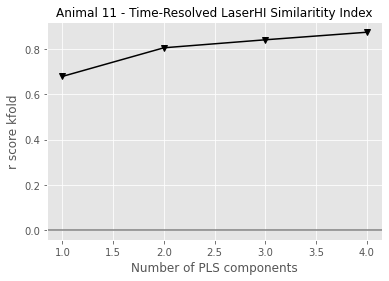

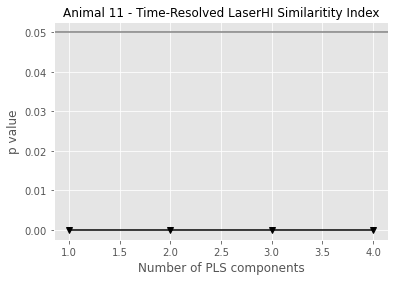

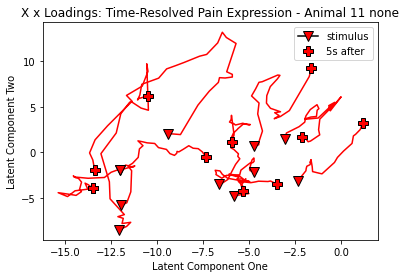

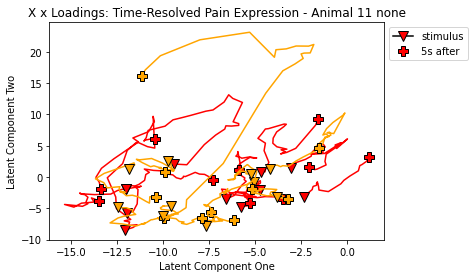

No handles with labels found to put in legend.


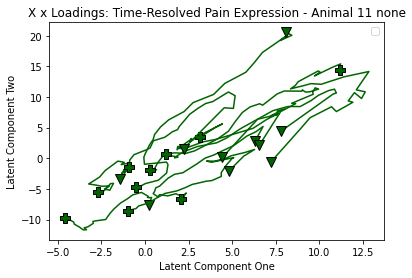

No handles with labels found to put in legend.


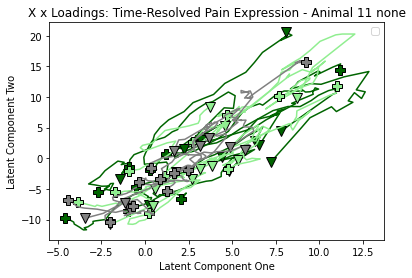

VAR  nonzeroed
1
2
3
4


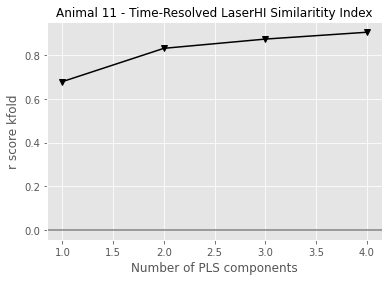

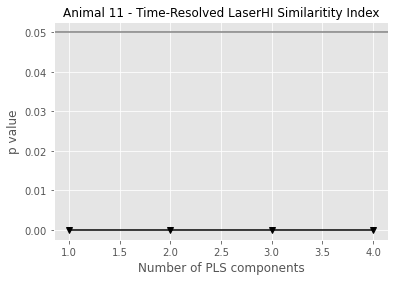

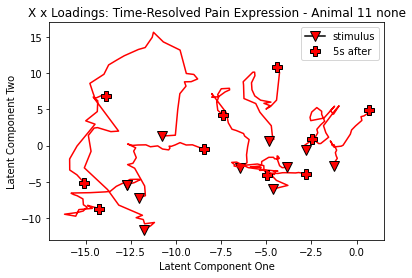

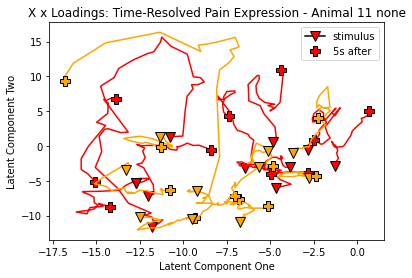

No handles with labels found to put in legend.


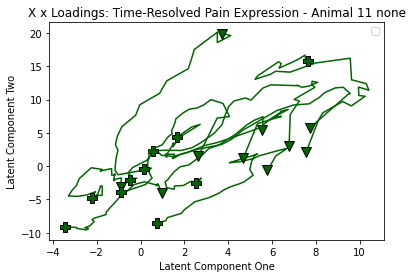

No handles with labels found to put in legend.


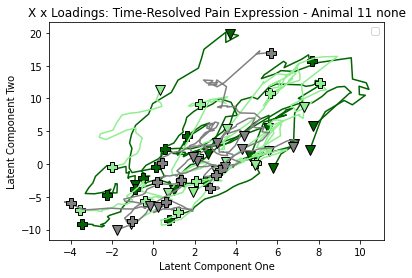

VAR  zeroed
1
2
3
4


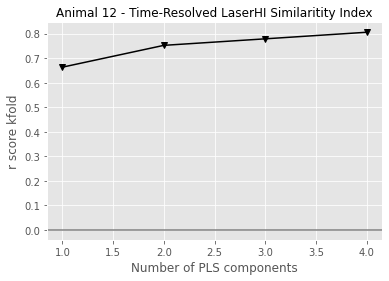

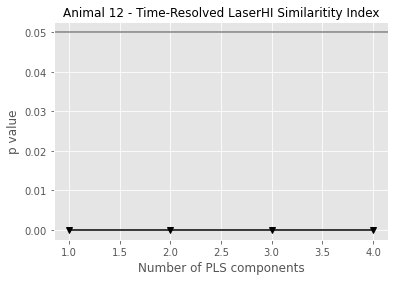

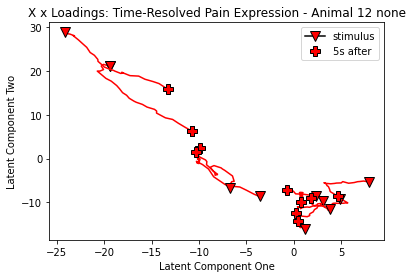

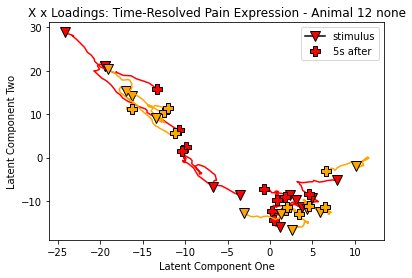

No handles with labels found to put in legend.


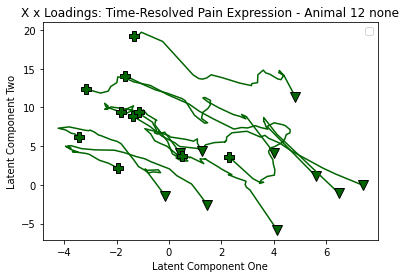

No handles with labels found to put in legend.


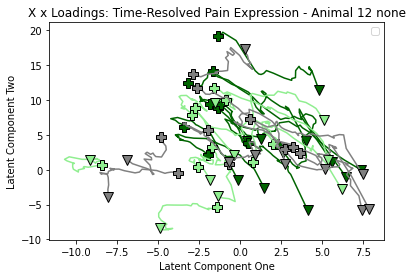

VAR  nonzeroed
1
2
3
4


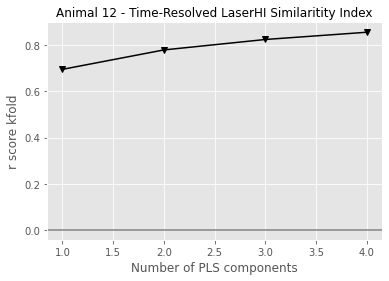

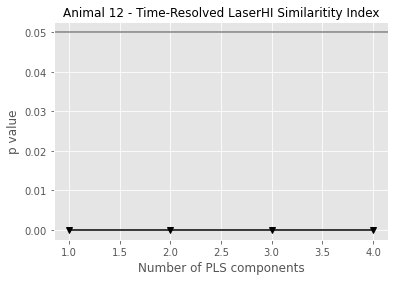

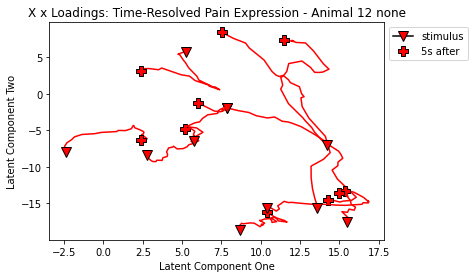

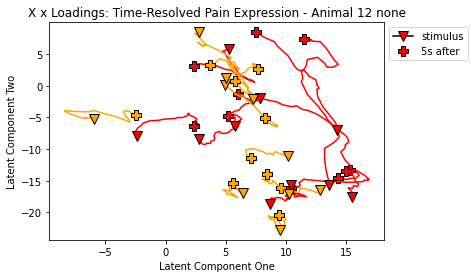

No handles with labels found to put in legend.


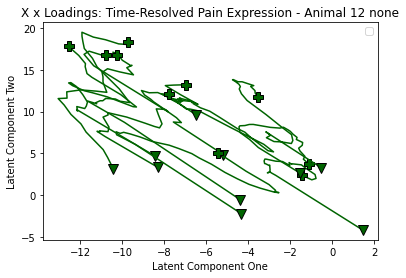

No handles with labels found to put in legend.


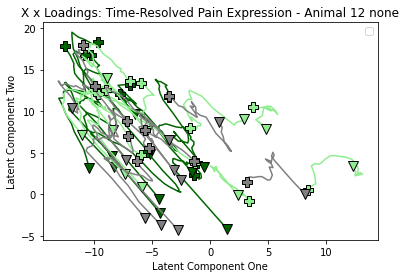

In [45]:
# Leave overnight to run
#Time-Resolved LaserHI Similarity Index PLSR
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
stimulus = "laserHI"
import matplotlib.pyplot as plt
for animall in [11,12]: #,12
    for typee in ["none"]: #,",normalized"
        for var in ["zeroed", "nonzeroed"]: #,"nonzeroed"
            print("VAR ", var)
            r,p,LX = PLSR_behavioral_time_resolved_similarity_index(animall, typee, stimulus, n_comp_max, k, n_permutations, var)
            with plt.style.context(('ggplot')): 
                plt.axhline(0, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('r score kfold')
            plt.title("Animal " + str(animall) + " - Time-Resolved LaserHI Similaritity Index")
            plt.savefig('presentation_timeresolvedPLSR_r_none'+ var + str(animall) + '.eps', format='eps')
            plt.show()
            with plt.style.context(('ggplot')): 
                plt.axhline(0.05, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('p value')
            plt.title("Animal " + str(animall) + " - Time-Resolved LaserHI Similaritity Index")
            plt.savefig('presentation_timeresolvedPLSR_p_none'+ var + str(animall) + '.eps', format='eps')
            plt.show()
            
            for trial in range(0,10):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            for trial in range(0,20):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            for trial in range(20,30):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            
            for trial in range(20,50):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            
            #for trial in range(0,50):
            #    plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            #    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            #    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            #    if(trial  == 0):
            #        plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
            #        plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            #plt.legend(bbox_to_anchor=(1, 1))     
            #plt.xlabel("Latent Component One")
            #plt.ylabel("Latent Component Two")
            #plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            #plt.show()

         0.s1     1.s1     2.s1     3.s1     4.s1     5.s1     6.s1     7.s1  \
0     0.48491 -0.45954  0.37273  0.68148  0.20741  1.38951  1.04772  1.42402   
1     0.37255 -0.46023  0.31807  0.61173  0.16178  1.87086  0.93113  2.02129   
2     0.27127 -0.46089  0.46627  0.54576  0.11881  1.69462  0.85449  1.82393   
3     0.17998 -0.46149  0.40504  0.48335  0.07833  1.52980  1.67140  1.64044   
4     0.09769 -0.46206  0.34811  0.42433  0.04021  1.37565  1.51535  1.46983   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2545 -0.64843  0.05778 -0.40584 -0.58441 -0.57712 -0.84954 -0.79481 -0.78799   
2546 -0.64902  0.02193 -0.40584 -0.58568 -0.57712 -0.84958 -0.79483 -0.78801   
2547 -0.64955 -0.01149 -0.40584 -0.58688 -0.57712 -0.84963 -0.79484 -0.78803   
2548 -0.65004 -0.04264 -0.40584 -0.58801 -0.57712 -0.84967 -0.79486 -0.78804   
2549 -0.65047 -0.07167 -0.40584 -0.58908 -0.57712 -0.84970 -0.79487 -0.78806   

         8.s1     9.s1  ...   108.s3   

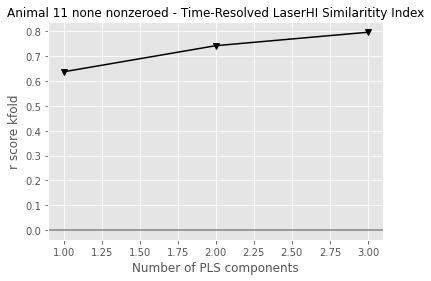

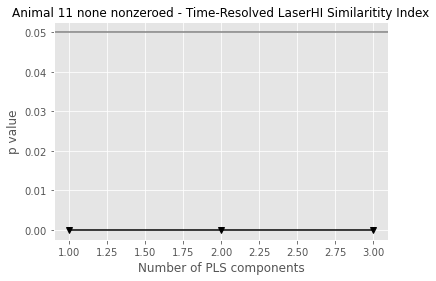

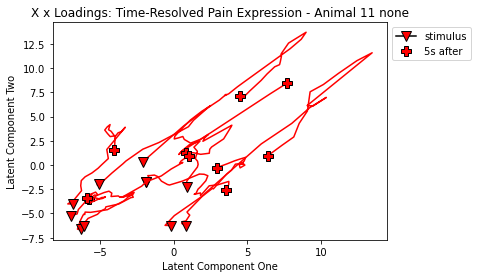

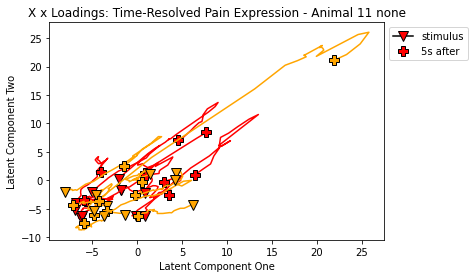

No handles with labels found to put in legend.


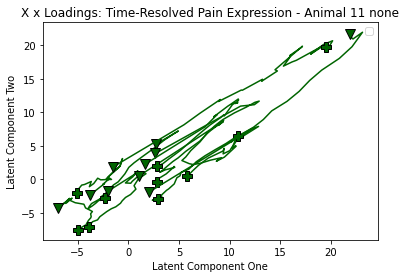

No handles with labels found to put in legend.


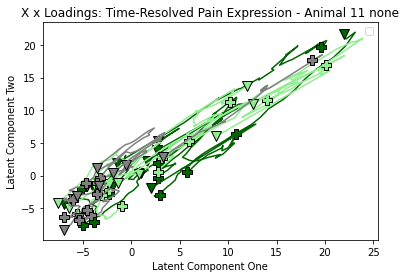

In [25]:
# WRONG TIMES
#Time-Resolved LaserHI Similarity Index PLSR
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 3 #8
n_permutations = 1000
k = 4
stimulus = "laserHI"
import matplotlib.pyplot as plt
for animall in [11]: #,12
    for typee in ["none"]: #,",normalized"
        for var in ["nonzeroed"]: #,"nonzeroed"
            r,p,LX = PLSR_behavioral_time_resolved_similarity_index(animall, typee, stimulus, n_comp_max, k, n_permutations, var)
            with plt.style.context(('ggplot')): 
                plt.axhline(0, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('r score kfold')
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(var) + " - Time-Resolved LaserHI Similaritity Index")
            plt.show()
            with plt.style.context(('ggplot')): 
                plt.axhline(0.05, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('p value')
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(var) + " - Time-Resolved LaserHI Similaritity Index")
            plt.show()
            
            for trial in range(0,10):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            for trial in range(0,20):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            for trial in range(20,30):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            
            for trial in range(20,50):
                plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
                if(trial  == 0):
                    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            plt.show()
            
            
            #for trial in range(0,50):
            #    plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            #    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            #    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            #    if(trial  == 0):
            #        plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
            #        plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
            #plt.legend(bbox_to_anchor=(1, 1))     
            #plt.xlabel("Latent Component One")
            #plt.ylabel("Latent Component Two")
            #plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
            #plt.show()
    


In [10]:
# Using Laplacian EigenMap X axis Value - Just Maxial Values in Laplacian
pd.options.display.float_format = "{:,.5f}".format
def PLSR_Laplacian_Max(animall, typee, n_comp_max, k, n_permutations, delay):
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Standardization happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    #stimulus order is different here
    lem = pd.read_csv("LEM_2D_Euclidian_Simple_Data_Animal" + str(animall) + ".csv", index_col = 0)
    for ind in lem.index:
        s = lem.at[ind,"image"]
        lem.at[ind,"index"] = s[0:-6]
        if(lem.at[ind,"stimulus"]=="early_shock"):
            lem.at[ind,"stimulus"] = "shock"
    lem = lem.drop(columns = ["y","image"])
    
    y = pd.DataFrame(columns = lem.columns)
    for stim in ["shock","shockCTRL","laserHI","laserLO","laserCTRL"]:
        temp = lem[lem["stimulus"].isin([stim])]
        y = pd.concat([y,temp])
    y = y.reset_index(drop = True)

    
    list_start = pd.read_csv('list_start'+ str(animall) + ".csv", index_col = 0)
    list_start = list_start.drop(columns = ['squeak','squeakCTRL'])
    
    X_inter = np.array(animal_scaled.drop(columns = ["stimulus"]))
    indices = []
    for trial in range(0,50):
        indices.append(delay + trial * 51 + int(y.at[trial,"index"])-int(list_start.at[trial%10,str(y.at[trial,"stimulus"])]))
    X_model = X_inter[indices,:]
           
    #Making y array to fit [0,1] or NOT?
    #similarity = (similarity-min(similarity.loc[:].tolist()))/(max(similarity.loc[:].tolist())-min(similarity.loc[:].tolist()))
    y = np.array(y.iloc[:,0])
    y = y.reshape((50,1))
    
    
    r_values = []
    p_values = []
    for comp in range(1,n_comp_max+1):
        r_averaged, _ = my_kfold_plsr(X_model, y, k, comp)
        r_values.append(r_averaged)
    
        _, p = my_permutation_plsr(X_model, y, k, comp, n_permutations)
        p_values.append(p)
        
        
    compp = 3
    pls = PLSRegression(n_components=compp) 
    pls.fit(X_model,y)
    loadings = pls.x_loadings_ 
    LX = np.dot(X_model,loadings)
        
    return r_values, p_values, LX
    


PLSR_Laplacian_Max(12,"none",3,4,1000,0)  



([0.38142790468424126, 0.3082533892712795, 0.31453419429713164],
 [0.013, 0.038, 0.05],
 array([[ -4.12442793,   3.2303966 ,  16.40653345],
        [-12.51238911,  22.03655901,  31.18750793],
        [ 14.92636353, -16.40420817,   6.23778086],
        [ 16.21894003, -10.06968511,  -4.15025547],
        [ 19.58965622,  -4.61121065,   6.42070616],
        [ 14.15674707,   5.32243144,  18.07892663],
        [ 18.68534451,  -7.9699976 ,  -2.68829643],
        [  9.915163  ,  -1.77021382,  -7.23968776],
        [ 11.25058537,  -0.04244273,  -1.52892242],
        [  5.92284271,  -5.33494409,  -3.3489946 ],
        [  0.443561  ,   1.12482493,   9.17880504],
        [ 19.60642801, -14.96763586,   3.28816932],
        [ -6.44255254,   6.27630318,   8.01183469],
        [ 12.89415465,  -6.32744213,  13.5819064 ],
        [-16.34757273,  27.15285582,  22.74805932],
        [ 15.56580492, -10.48245797,  -0.6058919 ],
        [ 19.25569153,  -9.19711602,   1.0793436 ],
        [ -8.51965808,   7.9

In [ ]:
#LEM Maximal Facial Expression
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
import matplotlib.pyplot as plt
for delay in [0]: #-1,-2,1,2,
    for animall in [11,12]: #,12
        for typee in ["none","normalized"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max(animall,typee,n_comp_max,k,n_permutations,delay)
            with plt.style.context(('ggplot')): 
                plt.axhline(0, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('r averaged kfold')
            plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM delay = " + str(delay))
            plt.show()
            with plt.style.context(('ggplot')): 
                plt.axhline(0.05, c = "gray")
                plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('p value')
            plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM delay = " + str(delay))
            plt.show()
            
            for trial in range(0,50):
                plt.scatter(LX[trial,0],LX[trial,1], color = colors.get(order_trials[int(trial/10)]))
                if(trial in [0,10,20,30,40]):
                    plt.scatter(LX[trial,0],LX[trial,1], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
            plt.legend(bbox_to_anchor=(1, 1))     
            plt.xlabel("Latent Component One")
            plt.ylabel("Latent Component Two")
            plt.title("X x Loadings: Max LEM - Animal " + str(animall) + " " + str(typee))
            plt.show()

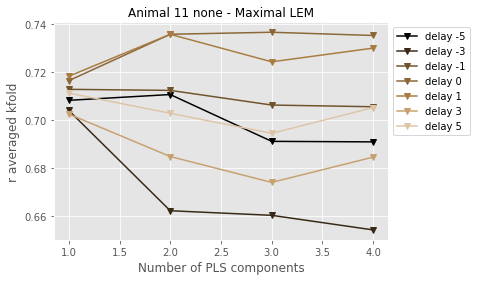

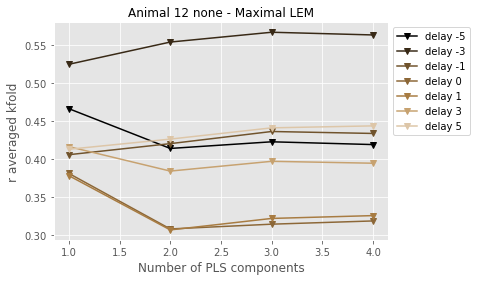

In [28]:
#LEM Maximal Facial Expression
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
import matplotlib.pyplot as plt
for animall in [11,12]: #,12
    for delay in [-5,-3,-1,0,1,3,5]: #-1,-2,1,2,
        for typee in ["none"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max(animall,typee,n_comp_max,k,n_permutations,delay)
            with plt.style.context(('ggplot')): 
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = adjust_lightness(mc.ColorConverter.to_rgb("tan"),(delay+5)/9), label =  "delay " + str(delay))  
                plt.xlabel('Number of PLS components')             
                plt.ylabel('r averaged kfold')
    plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
    #for delay in [-8,-6,-4,-2,0,2,4,6,8]: #-1,-2,1,2,
    #    for typee in ["none"]: #,",normalized"
    #        r,p,LX = PLSR_Laplacian_Max(animall,typee,n_comp_max,k,n_permutations,delay)
    #        with plt.style.context(('ggplot')): 
    #            plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = adjust_lightness(mc.ColorConverter.to_rgb("tan"),(delay+6)/10), label =  "delay " + str(delay))  
    #            plt.xlabel('Number of PLS components')             
    #            plt.ylabel('p value')
    #plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM")
    #plt.legend(bbox_to_anchor=(1, 1))
    #plt.show()
            #with plt.style.context(('ggplot')): 
            #    plt.axhline(0.05, c = "gray")
            #    plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
            #    plt.xlabel('Number of PLS components')             
            #    plt.ylabel('p value')
            #plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM delay = " + str(delay))
            #plt.show()
            
            #for trial in range(0,50):
            #    plt.scatter(LX[trial,0],LX[trial,1], color = colors.get(order_trials[int(trial/10)]))
            #    if(trial in [0,10,20,30,40]):
            #        plt.scatter(LX[trial,0],LX[trial,1], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
            #plt.legend(bbox_to_anchor=(1, 1))     
            #plt.xlabel("Latent Component One")
            #plt.ylabel("Latent Component Two")
            #plt.title("X x Loadings: Max LEM - Animal " + str(animall) + " " + str(typee))
            #plt.show()

In [10]:
# Using Laplacian EigenMap X axis Value - Just Maxial Values in Laplacian
pd.options.display.float_format = "{:,.5f}".format
def PLSR_Laplacian_Max_Averaged(animall, typee, n_comp_max, k, n_permutations, frames_avg_direction, delay):
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Standardization happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    #stimulus order is different here
    lem = pd.read_csv("LEM_2D_Euclidian_Kernel_Data_More_Animal" + str(animall) + ".csv", index_col = 0)
    for ind in lem.index:
        s = lem.at[ind,"image"]
        lem.at[ind,"index"] = s[0:-6]
        if(lem.at[ind,"stimulus"]=="early_shock"):
            lem.at[ind,"stimulus"] = "shock"
    lem = lem.drop(columns = ["y","image"])
    
    y_temp = pd.DataFrame(columns = lem.columns)
    for stim in ["shock","shockCTRL","laserHI","laserLO","laserCTRL"]:
        temp = lem[lem["stimulus"].isin([stim])]
        y_temp = pd.concat([y_temp,temp])
    y_temp = y_temp.reset_index(drop = True)
    
    list_start = pd.read_csv('list_start'+ str(animall) + ".csv", index_col = 0)
    list_start = list_start.drop(columns = ['squeak','squeakCTRL'])
    
    X_inter = pd.DataFrame(animal_scaled.drop(columns = ["stimulus"]))
    X_mod = pd.DataFrame(index = X_inter.columns)
    y_t = pd.DataFrame(y_temp.drop(columns = ["index","stimulus"]))
    y_mod = pd.DataFrame(index = y_t.columns)
    for trial in range(0,50):
        ind = trial*51+int(y_temp.at[11*trial+5,"index"])-int(list_start.at[trial%10,str(y_temp.at[11*trial+5,"stimulus"])])
        X_mod[trial] = X_inter[ind-frames_avg_direction+delay:ind+frames_avg_direction+1+delay].sum()
        ind_y = ind - trial*51 + trial *11
        y_mod[trial] = y_t[ind_y-frames_avg_direction:ind_y+frames_avg_direction+1].sum()
    X_mod = X_mod /(frames_avg_direction*2+1)
    y_mod = y_mod /(frames_avg_direction*2+1)
    
    X_mod.to_csv("presentation_X_MAX_LEM.csv")
    y_mod.to_csv("presentation_y_MAX_LEM.csv")
    
    X_model = np.array(X_mod.T)
    y = np.array(y_mod.T)
    

           
    #Making y array to fit [0,1] or NOT?
   
    
    r_values = []
    p_values = []
    for comp in range(1,n_comp_max+1):
        print(comp)
        r_averaged, _ = my_kfold_plsr(X_model, y, k, comp)
        r_values.append(r_averaged)
    
        _, p = my_permutation_plsr(X_model, y, k, comp, n_permutations)
        p_values.append(p)
        
        
    compp = 3
    pls = PLSRegression(n_components=compp) 
    pls.fit(X_model,y)
    loadings = pls.x_loadings_ 
    LX = np.dot(X_model,loadings)
        
    return r_values, p_values, LX
        
    


PLSR_Laplacian_Max_Averaged(12,"none",3,4,1000,3,0)  



1
2
3


([0.2720089460361601, 0.21682047125605475, 0.2302788704317125],
 [0.083, 0.139, 0.119],
 array([[  8.46273   ,  -1.66363354,  -0.05580348],
        [ 20.99766963, -17.47206392, -12.74785904],
        [ -6.33818033,   8.79381309,  -3.64760588],
        [-15.66207318,  10.35771336,  10.62671681],
        [-19.66642311,   1.60890938, -13.31500389],
        [-13.4797385 ,  -6.64593786, -27.26192034],
        [-19.34342746,   7.18382838,   8.62812019],
        [-10.53401179,   0.87397709,  10.82120256],
        [ -9.70096074,   4.09160205,   1.0409647 ],
        [ -7.51595267,   3.75048634,   1.2911793 ],
        [  3.64940253,   4.36777494,   0.54242691],
        [-16.11837468,  18.99773986,  -4.5157469 ],
        [ 11.79192133,  -0.78754325,   7.45003431],
        [ -8.61849694,   9.03378983,  -6.15942952],
        [ 21.69966524, -23.79601077, -18.10944612],
        [-15.43202955,  11.03525341,   2.39888716],
        [-19.71393017,   6.13897746,  -2.64283937],
        [  7.8204011 , -11.1

1
2
3
4


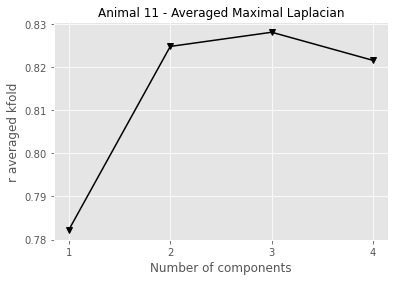

1
2
3
4


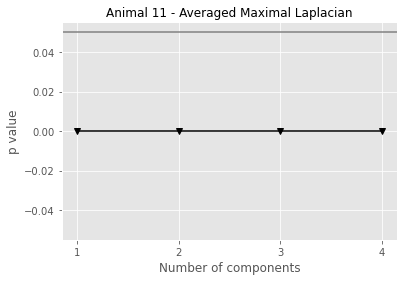

1
2
3
4


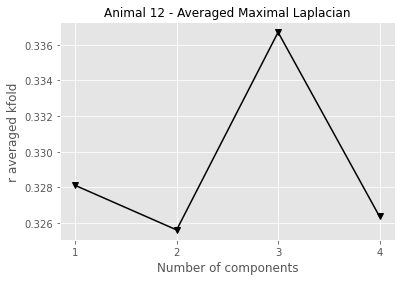

1
2
3
4


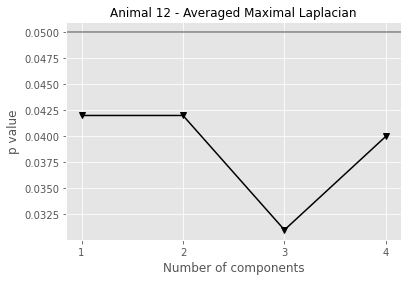

In [10]:
#LEM Maximal Facial Expression - Looking for delays plots
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
frames_avg_direction = 5
import matplotlib.pyplot as plt
for animall in [11, 12]: #,11
    for delay in [0]: #-1,-2,1,2,
        for typee in ["none"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max_Averaged(animall, typee, n_comp_max, k, n_permutations, frames_avg_direction, delay)
            with plt.style.context(('ggplot')): 
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black", label =  "delay " + str("{:.1f}".format(delay/fps)) +"s")  
                plt.xlabel('Number of components')             
                plt.ylabel('r averaged kfold')
    plt.title("Animal " + str(animall) + " - Averaged Maximal Laplacian")
    plt.xticks([1,2,3,4])
    plt.savefig('presentation_behavioralPLSR_laplacian_r' + str(animall) + '.eps', format='eps')
    plt.show()
    
    for delay in [0]: #-1,-2,1,2,
        for typee in ["none"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max_Averaged(animall, typee, n_comp_max, k, n_permutations, frames_avg_direction, delay)
            with plt.style.context(('ggplot')): 
                plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black", label =  "delay " + str("{:.1f}".format(delay/fps)) + "s")  
                plt.xlabel('Number of components')             
                plt.ylabel('p value')
    plt.title("Animal " + str(animall) + " - Averaged Maximal Laplacian")
    plt.axhline(0.05, c = "gray")
    plt.xticks([1,2,3,4])
    plt.savefig('presentation_behavioralPLSR_laplacian_p' + str(animall) + '.eps', format='eps')
    plt.show()
            #with plt.style.context(('ggplot')): 
            #    plt.axhline(0.05, c = "gray")
            #    plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
            #    plt.xlabel('Number of PLS components')             
            #    plt.ylabel('p value')
            #plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM delay = " + str(delay))
            #plt.show()
            
            #for trial in range(0,50):
            #    plt.scatter(LX[trial,0],LX[trial,1], color = colors.get(order_trials[int(trial/10)]))
            #    if(trial in [0,10,20,30,40]):
            #        plt.scatter(LX[trial,0],LX[trial,1], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
            #plt.legend(bbox_to_anchor=(1, 1))     
            #plt.xlabel("Latent Component One")
            #plt.ylabel("Latent Component Two")
            #plt.title("X x Loadings: Max LEM - Animal " + str(animall) + " " + str(typee))
            #plt.show()

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


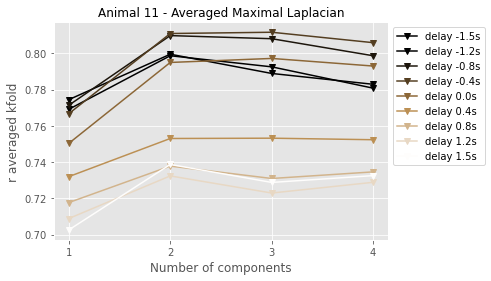

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


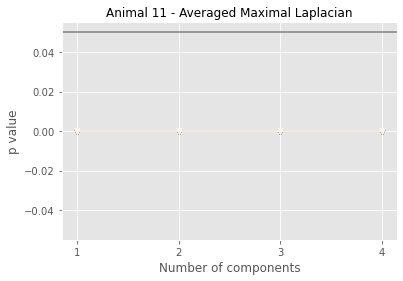

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


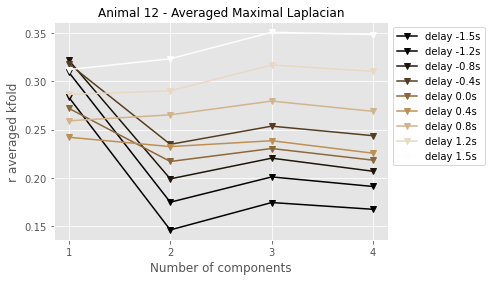

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


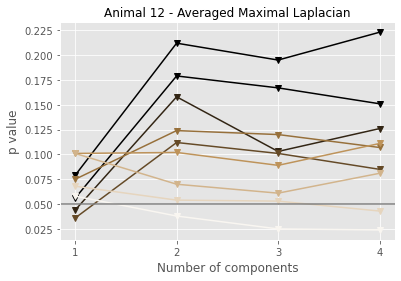

In [11]:
#LEM Maximal Facial Expression - Looking for delays plots
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
frames_avg_direction = 3
import matplotlib.pyplot as plt
for animall in [11,12]: #,12
    for delay in [-8,-6,-4,-2,0,2,4,6,8]: #-1,-2,1,2,
        for typee in ["none"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max_Averaged(animall, typee, n_comp_max, k, n_permutations, frames_avg_direction, delay)
            with plt.style.context(('ggplot')): 
                plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = adjust_lightness(mc.ColorConverter.to_rgb("tan"),(delay+5)/9), label =  "delay " + str("{:.1f}".format(delay/fps)) +"s")  
                plt.xlabel('Number of components')             
                plt.ylabel('r averaged kfold')
    plt.title("Animal " + str(animall) + " - Averaged Maximal Laplacian")
    plt.xticks([1,2,3,4])
    plt.legend(bbox_to_anchor=(1, 1))
    plt.savefig('presentation_behavioralPLSR_delay_r' + str(animall) + '.eps', format='eps')
    plt.show()
    
    for delay in [-8,-6,-4,-2,0,2,4,6,8]: #-1,-2,1,2,
        for typee in ["none"]: #,",normalized"
            r,p,LX = PLSR_Laplacian_Max_Averaged(animall, typee, n_comp_max, k, n_permutations, frames_avg_direction, delay)
            with plt.style.context(('ggplot')): 
                plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = adjust_lightness(mc.ColorConverter.to_rgb("tan"),(delay+6)/10), label =  "delay " + str("{:.1f}".format(delay/fps)) + "s")  
                plt.xlabel('Number of components')             
                plt.ylabel('p value')
    plt.title("Animal " + str(animall) + " - Averaged Maximal Laplacian")
    plt.axhline(0.05, c = "gray")
    plt.xticks([1,2,3,4])
    #plt.legend(bbox_to_anchor=(1, 1))
    plt.savefig('presentation_behavioralPLSR_delay_p' + str(animall) + '.eps', format='eps')
    plt.show()
            #with plt.style.context(('ggplot')): 
            #    plt.axhline(0.05, c = "gray")
            #    plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
            #    plt.xlabel('Number of PLS components')             
            #    plt.ylabel('p value')
            #plt.title("Animal " + str(animall) + " " + str(typee) + " - Maximal LEM delay = " + str(delay))
            #plt.show()
            
            #for trial in range(0,50):
            #    plt.scatter(LX[trial,0],LX[trial,1], color = colors.get(order_trials[int(trial/10)]))
            #    if(trial in [0,10,20,30,40]):
            #        plt.scatter(LX[trial,0],LX[trial,1], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
            #plt.legend(bbox_to_anchor=(1, 1))     
            #plt.xlabel("Latent Component One")
            #plt.ylabel("Latent Component Two")
            #plt.title("X x Loadings: Max LEM - Animal " + str(animall) + " " + str(typee))
            #plt.show()

In [106]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
#ignoring warnings because of Pearson Correlation
def PLSR_LEM_Max_timepoint(stim_model, animall, typee, time_point, n_components, n_permutations, k, laserLOout):
    colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    elif(typee == 'normalized_ratio'):
        animal = animal_normalized_ratio(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Mean-Centering happens for time period of all trials from all stimuli, for each neuron (column) individually
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    
    lem = pd.read_csv("LEM_2D_Euclidian_Simple_Data_Animal" + str(animall) + ".csv", index_col = 0)
    for ind in lem.index:
        s = lem.at[ind,"image"]
        lem.at[ind,"index"] = s[0:-6]
        if(lem.at[ind,"stimulus"]=="early_shock"):
            lem.at[ind,"stimulus"] = "shock"
    lem = lem.drop(columns = ["y","image"])
    
    if(stim_model == 'shock'):
        temp1 = animal_scaled[animal_scaled['stimulus'] == 'shock']
        temp2 = animal_scaled[animal_scaled['stimulus'] == 'shockCTRL']
        temp1 = temp1.reset_index(drop = True)
        temp2 = temp2.reset_index(drop = True)
        #print(temp1)
        #print(temp2)
        keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
        temp1 = temp1.iloc[keeping,:]
        temp2 = temp2.iloc[keeping,:]
        temp = pd.concat([temp1,temp2])
        temp = temp.drop(columns = 'stimulus')
        X_model = np.array(temp)
        #10 trials of shock, then 10 trials of shockCTRL
        #stimulus order is different here
        y = pd.DataFrame(columns = lem.columns)
        for stim in ["shock","shockCTRL"]:
            temp = lem[lem["stimulus"].isin([stim])]
            y = pd.concat([y,temp])
        y = y.reset_index(drop = True)
        y = np.array(y.iloc[:,0])
        y = y.reshape((20,1))    
    elif(stim_model == 'laserHI'):
        if(laserLOout == 'with'):
            temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
            temp2 = animal_scaled[animal_scaled['stimulus'] == 'laserLO']
            temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
            temp1 = temp1.reset_index(drop = True)
            temp2 = temp2.reset_index(drop = True)
            temp3 = temp3.reset_index(drop = True)
            keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
            temp1 = temp1.iloc[keeping,:]
            temp2 = temp2.iloc[keeping,:]
            temp3 = temp3.iloc[keeping,:]
            temp = pd.concat([temp1,temp2,temp3])
            temp = temp.drop(columns = 'stimulus')
            X_model = np.array(temp)
            #10 trials of laserHI, then 10 trials of laserLO, then 10 of laserCTRL
            y = pd.DataFrame(columns = lem.columns)
            for stim in ["laserHI","laserLO","laserCTRL"]:
                temp = lem[lem["stimulus"].isin([stim])]
                y = pd.concat([y,temp])
            y = y.reset_index(drop = True)
            y = np.array(y.iloc[:,0])
            y = y.reshape((30,1))
        elif(laserLOout == 'without'):
            temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
            temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
            temp1 = temp1.reset_index(drop = True)
            temp3 = temp3.reset_index(drop = True)
            keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
            temp1 = temp1.iloc[keeping,:]
            temp3 = temp3.iloc[keeping,:]
            temp = pd.concat([temp1,temp3])
            temp = temp.drop(columns = 'stimulus')
            X_model = np.array(temp)
            y = pd.DataFrame(columns = lem.columns)
            for stim in ["laserHI","laserCTRL"]:
                temp = lem[lem["stimulus"].isin([stim])]
                y = pd.concat([y,temp])
            y = y.reset_index(drop = True)
            y = np.array(y.iloc[:,0])
            y = y.reshape((20,1))
           
    r_averaged, r_repeated = my_kfold_plsr(X_model, y, k, n_components)
    
    r_permuted, p = my_permutation_plsr(X_model, y, k, n_components, n_permutations)
        
    return r_averaged, r_permuted, p
    
    
PLSR_LEM_Max_timepoint('laserHI', 12, 'none', 35, 3, 100, 4, "without")

(0.35997616252631237,
 [0.05895985898428829,
  0.1965369925349347,
  -0.550100108868357,
  0.17264291237047966,
  -0.3775167691032404,
  0.430155268767133,
  -0.02448286532037823,
  -0.05656357823809772,
  -0.14949142343447247,
  0.08224008534227294,
  -0.24297159949116812,
  -0.4195792679314301,
  0.43202108722286126,
  -0.40638696908786603,
  0.48206256809770176,
  -0.03396674368027279,
  -0.0938214093444317,
  -0.04827195134809667,
  -0.0446285150864979,
  0.15518868582187959,
  0.1423743208514551,
  -0.11213371637888953,
  0.11626712717153953,
  -0.2702761002437273,
  0.14920040178854,
  0.275504748673282,
  0.12502003713613946,
  -0.12579427358755912,
  0.12096198025369065,
  0.10454872199814692,
  -0.1729284438184442,
  0.6406839493293918,
  -0.2470606558329699,
  -0.34341230270994483,
  -0.13457787877765612,
  0.2082394723174068,
  0.17648510090684535,
  0.21131374955843332,
  0.09237448912184551,
  0.31543224293195454,
  0.26881066427588984,
  0.045007795362093435,
  0.04349594

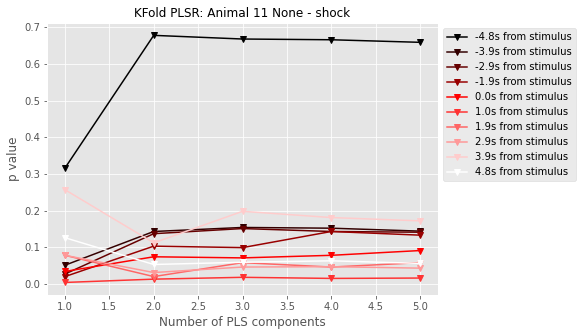

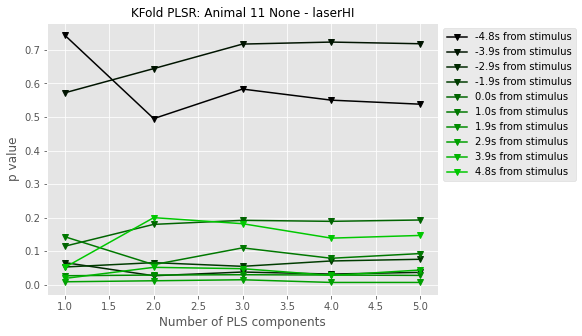

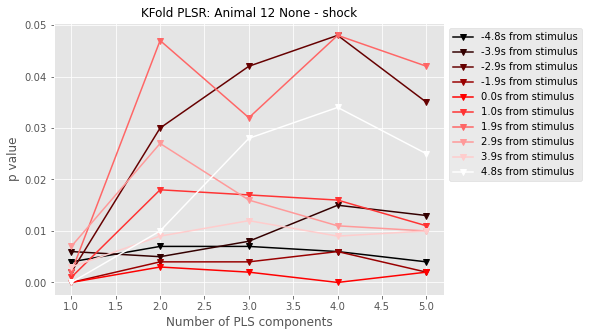

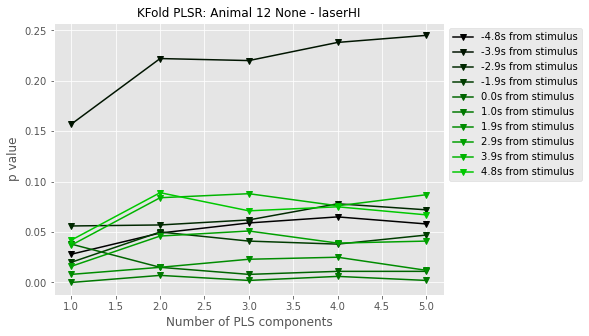

In [110]:
# Function of r value in terms of number of components for a few time_points
n_permutations = 1000
k = 4
for animall in [11,12]:
    for stim_model in ['shock','laserHI']:

        plt.figure(figsize = (7,5))
        for time_point in [0,5,10,15,25,30,35,40,45,50]:
            r_comp = []
            p_comp = []
            for comp in [1,2,3,4,5]:
                r,_, p = PLSR_stimblocks_timepoints_personalized_permutation(stim_model, animall, 'none', time_point, comp, n_permutations, k, "with")
                r_comp.append(r)
                p_comp.append(p)
            time_from_stimulus = (time_point-25) / fps
            with plt.style.context(('ggplot')): 
                plt.plot([1,2,3,4,5], np.array(p_comp), '-v', color = adjust_lightness(mc.ColorConverter.to_rgb(colors.get(stim_model)),time_point/25), label =  str(float("{0:.1f}".format(time_from_stimulus))) + "s from stimulus")             
                plt.legend(bbox_to_anchor=(1, 1))
                plt.xlabel('Number of PLS components')             
                plt.ylabel('p value')
                #time_from_stimulus = (time_point-25) / fps
        plt.title('KFold PLSR: Animal ' + str(animall) + ' None - ' + str(stim_model))                      
        plt.show() 

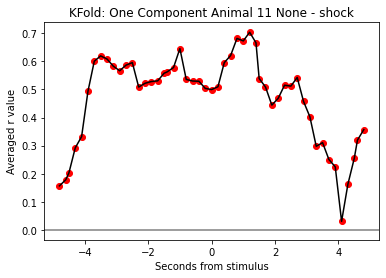

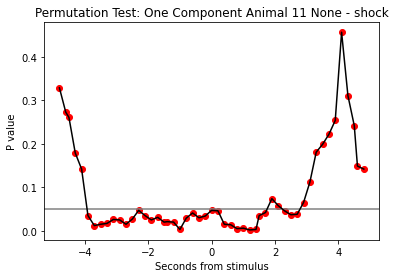

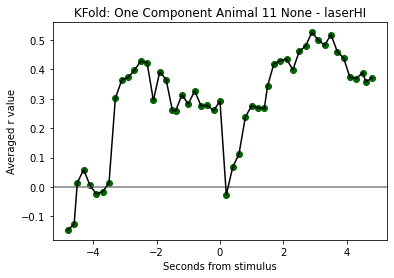

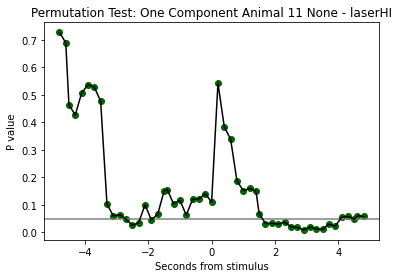

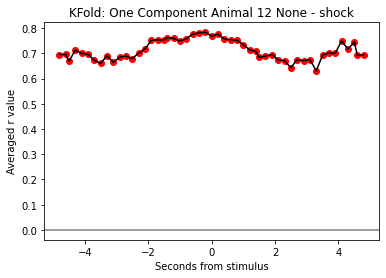

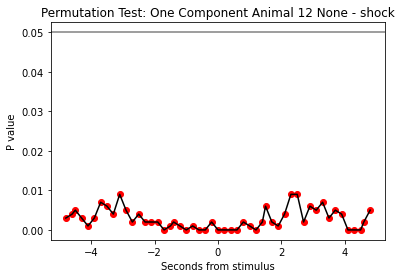

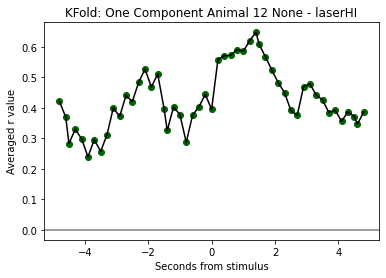

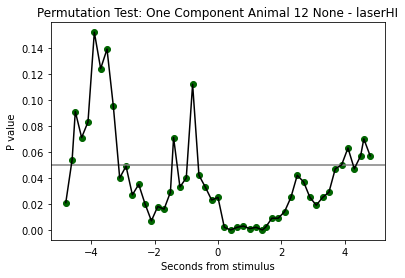

In [111]:
# PRESS AND R^2 SCORES GIVE same results but reversed (higher press means lower r score)
# For "None" = only mean-centering, not subtracting baselinee
# these values can be played with
comp = 1
n_permutations = 1000
k = 4
for animall in [11,12]:
    for stim_model in ['shock','laserHI']:

        time_stim = []
        r_real = []
        pvalues = []
        for time_point in range(0,51):
            time_stim.append(float("{0:.1f}".format((time_point-25) / fps)))
            r,_, p = PLSR_LEM_Max_timepoint(stim_model, animall, 'none', time_point, comp, n_permutations, k, "with")
            r_real.append(r)
            pvalues.append(p)

        plt.axhline(0, c = 'gray')
        plt.plot(time_stim, r_real, c = 'black')
        plt.scatter(time_stim, r_real, c = colors.get(stim_model))
        plt.title("KFold: One Component Animal "  + str(animall) + ' None - ' + str(stim_model) )
        plt.ylabel("Averaged r value")
        plt.xlabel("Seconds from stimulus")
        plt.show()

        plt.axhline(0.05, c = 'gray')
        plt.plot(time_stim, pvalues, c = 'black')
        plt.scatter(time_stim, pvalues, c = colors.get(stim_model))
        plt.title("Permutation Test: One Component Animal "  + str(animall) + ' None - ' + str(stim_model))
        plt.ylabel("P value")
        plt.xlabel("Seconds from stimulus")
        plt.show()

In [61]:
# Reading Pupil Data
def pupil_preparation(animall):
    df = pd.read_csv("animal_" + str(animall) + "_pupilDLC_resnet50_Pupil_NetworkJun15shuffle1_1030000.csv")
    for col in [3,6,9,12,15,18,21,24,27]:
        for ind in df.index:
            if(df.iat[ind,col]<0.9):
                df.iat[ind,col-1] = np.nan
                df.iat[ind,col-2] = np.nan
    df = df.drop(columns = ["pupilNorth.p","pupilEast.p","pupilSouth.p","pupilWest.p","pupilCenter.p","eyeNorth.p","eyeEast.p","eyeSouth.p","eyeWest.p"])
    # preparing similarity index (reordered like the neural activity) 10 shock, 10 shock CTRL...10 laserCTRL (no squeaks)
    sec = 5
    fps = 15.49/3
    frames_interval = int(sec * fps)
    total_frames = 2 * frames_interval + 1
    #frames interval is 25, total frames is 51

    temp = pd.DataFrame.copy(df, deep = True)
    
    #stimulus times are from behavioral data, so list_start
    list_start = pd.read_csv('list_start'+ str(animall) + ".csv", index_col = 0)
    time = pd.concat([list_start["shock"],list_start["shockCTRL"],list_start["laserHI"],list_start["laserLO"],list_start["laserCTRL"], list_start["squeak"], list_start["squeakCTRL"]], axis = 0)
    times = pd.DataFrame(columns = ["value","index","stimulus"])
    times["value"] = pd.Series(time)
    times = times.reset_index(drop = True)
    for ind in range(0,10):
        times.at[ind,"index"]=ind
        times.at[ind,"stimulus"]="shock"
    for ind in range(10,20):
        times.at[ind,"index"]=ind-10
        times.at[ind,"stimulus"]="shockCTRL"
    for ind in range(20,30):
        times.at[ind,"index"]=ind-20
        times.at[ind,"stimulus"]= "laserHI"
    for ind in range(30,40):
        times.at[ind,"index"]=ind-30
        times.at[ind,"stimulus"]= "laserLO"
    for ind in range(40,50):
        times.at[ind,"index"]=ind-40
        times.at[ind,"stimulus"]= "laserCTRL"
    for ind in range(50,60):
        times.at[ind,"index"]=ind-50
        times.at[ind,"stimulus"]= "squeak"
    for ind in range(60,70):
        times.at[ind,"index"]=ind-60
        times.at[ind,"stimulus"]= "squeakCTRL"
    times = times.sort_values(by="value", ignore_index = True)
    #print(times)
    
    
    keeping = []
    for val in times['value']:
        for add in range(-frames_interval,frames_interval+1):
            keeping.append(val+add)
    dropping = list(set(temp.index).difference(keeping))
    temp = temp.drop(temp.index[dropping], inplace = False)
    indices = pd.DataFrame(data = temp.index, columns = ['index'])
    temp = temp.reset_index(drop = True)
    temp['stimulus'] = pd.Series(dtype = str)
    z = 0
    for stim in times['stimulus']:
        for add in range(0,total_frames):
            temp.at[z,'stimulus'] = stim
            z = z + 1
 
    df_stimulus = pd.DataFrame.copy(temp, deep = True)
    df_stimulus = pd.concat([df_stimulus,indices], axis = 1)
    
    
    df_stimulus["pupilDiameter"] = pd.Series(float)
    for ind in df_stimulus.index:
        if(df_stimulus.at[ind,"pupilEast.x"]!= np.nan and df_stimulus.at[ind,"pupilCenter.x"] != np.nan):
            a = [df_stimulus.at[ind,"pupilEast.x"],df_stimulus.at[ind,"pupilEast.y"]]
            b = [df_stimulus.at[ind,"pupilCenter.y"],df_stimulus.at[ind,"pupilCenter.y"]]
            df_stimulus.at[ind,"pupilDiameter"] = 2 * np.linalg.norm(np.array(a)-np.array(b))
        if(str(df_stimulus.at[ind,"pupilNorth.x"])!= 'nan' and df_stimulus.at[ind,"pupilCenter.x"] != np.nan):
            a = [df_stimulus.at[ind,"pupilNorth.x"],df_stimulus.at[ind,"pupilNorth.y"]]
            b = [df_stimulus.at[ind,"pupilCenter.y"],df_stimulus.at[ind,"pupilCenter.y"]]
            df_stimulus.at[ind,"pupilDiameter"] = df_stimulus.at[ind,"pupilDiameter"]/2 + np.linalg.norm(np.array(a)-np.array(b))
    #print(df_stimulus.sort_values(by = 'pupilDiameter'))
    
    df_stimulus.to_csv("animal_" + str(animall) + "_pupilData.csv")
pupil_preparation("11")
pupil_preparation("12")

In [64]:
def PLSR_time_resolved_pupil(animall, typee, n_comp_max, k, n_permutations):
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Standardization happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    #animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    pupildata = pd.read_csv("animal_" + str(animall) + "_pupilData.csv", index_col = 0)
    pupildata = pupildata["pupilDiameter"]
    for ind in pupildata.index:
        if(ind in pupildata[pupildata.isna().isin([True])].index):
            if(pupildata.iat[ind-1] != np.nan):
                   pupildata.iat[ind] = pupildata.iat[ind-1]
            elif(pupildata.iat[ind+1] != np.nan):
                   pupildata.iat[ind] = pupildata.iat[ind+1]
            elif(pupildata.iat[ind-2] != np.nan):
                   pupildata.iat[ind] = pupildata.iat[ind-2]
            elif(pupildata.iat[ind+2] != np.nan):
                   pupildata.iat[ind] = pupildata.iat[ind+2]
    
    X_model = np.array(animal_scaled.drop(columns = ["stimulus"]))
    y = np.array(pupildata)
    y = y.reshape((3570,1))
    
    r_values = []
    p_values = []
    for comp in range(1,n_comp_max+1):
        print(comp)
        r_averaged, _ = my_kfold_plsr(X_model, y, k, comp)
        r_values.append(r_averaged)
    
        _, p = my_permutation_plsr(X_model, y, k, comp, n_permutations)
        p_values.append(p)
        
    compp = 3
    pls = PLSRegression(n_components=compp) 
    pls.fit(X_model,y)
    loadings = pls.x_loadings_ 
    LX = np.dot(X_model,loadings)
        
    return r_values, p_values, LX
    
    
#PLSR_time_resolved_pupil(11, "none", 3, 4, 1000)


 
    

1
2
3
4


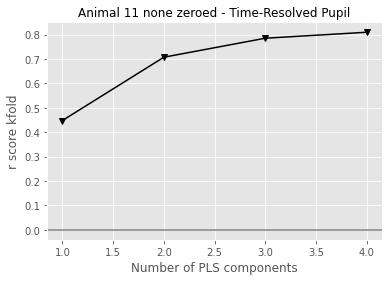

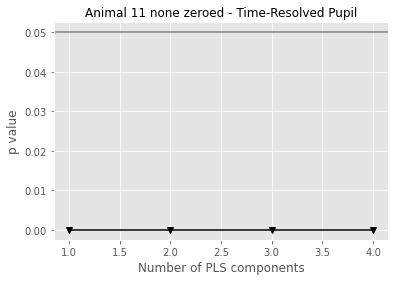

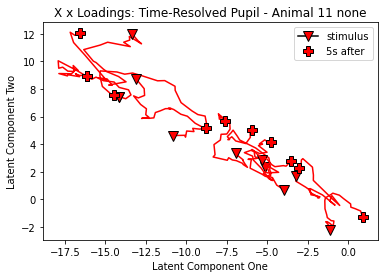

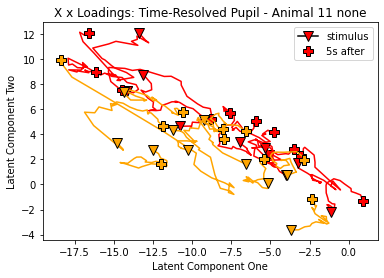

No handles with labels found to put in legend.


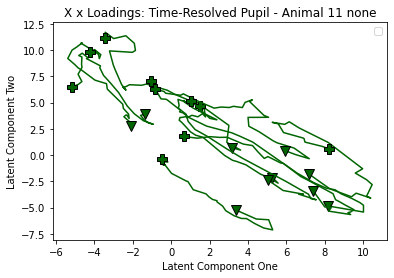

No handles with labels found to put in legend.


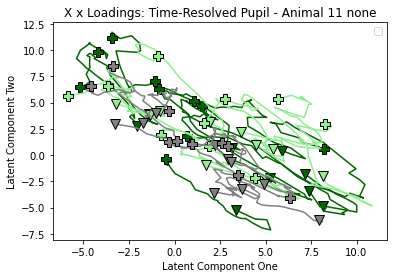

1
2
3
4


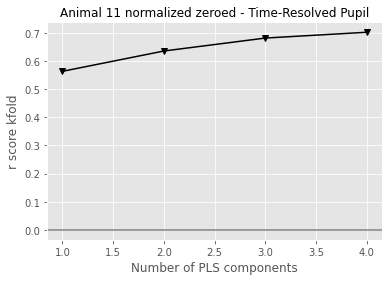

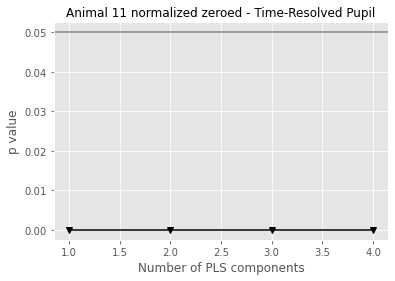

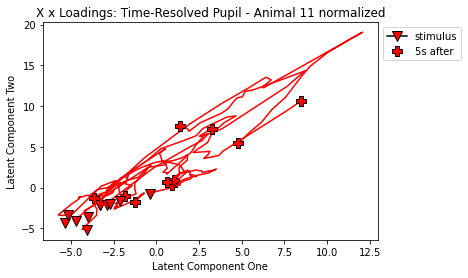

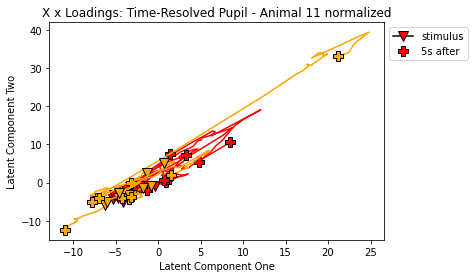

No handles with labels found to put in legend.


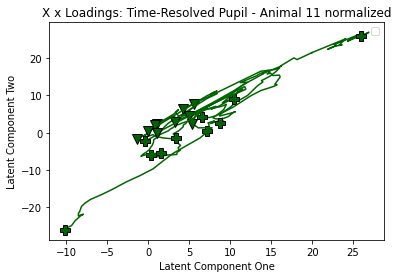

No handles with labels found to put in legend.


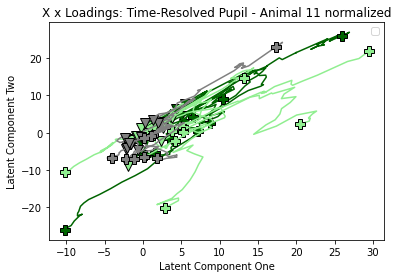

1
2
3
4


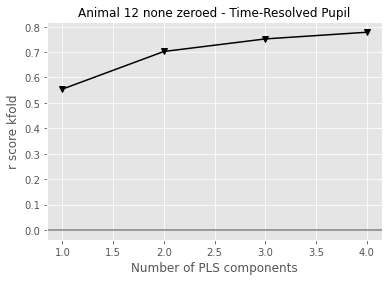

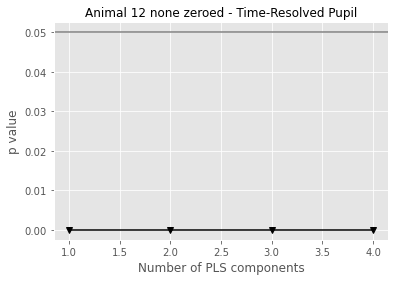

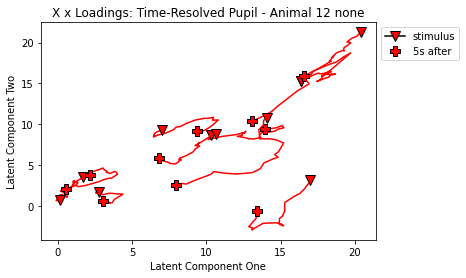

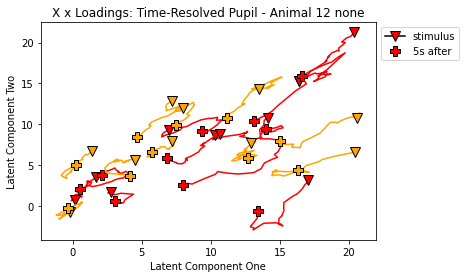

No handles with labels found to put in legend.


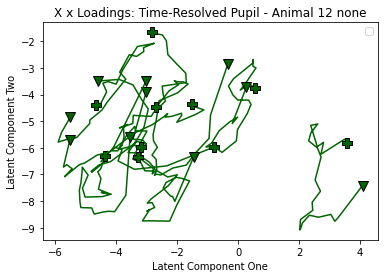

No handles with labels found to put in legend.


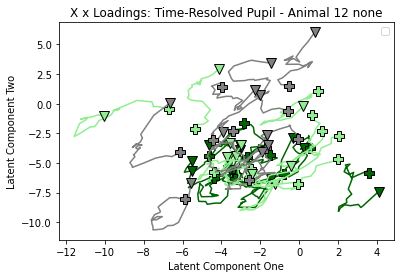

1
2
3
4


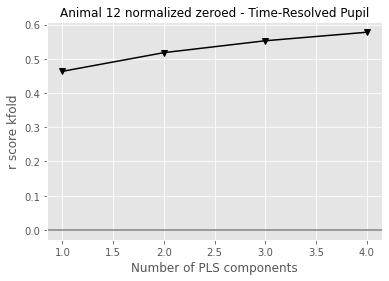

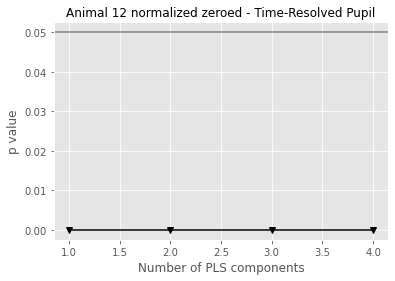

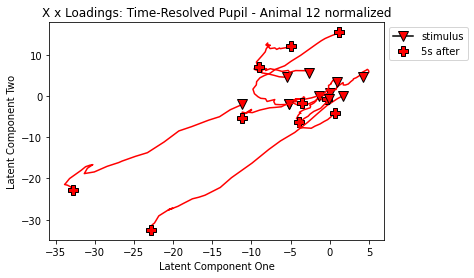

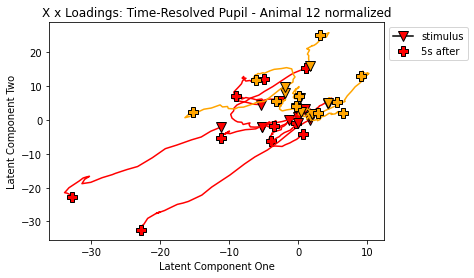

No handles with labels found to put in legend.


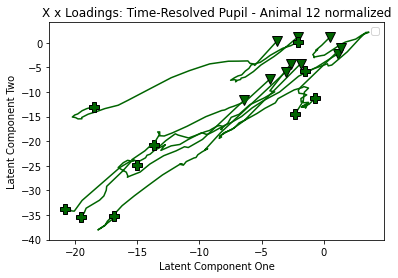

No handles with labels found to put in legend.


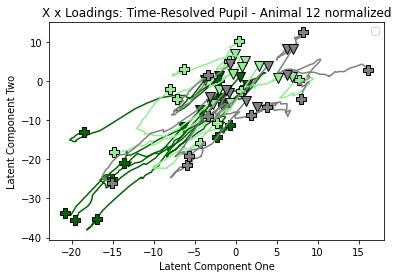

In [65]:
# Leave overnight to run
#Time-Resolved LaserHI Similarity Index PLSR
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
n_comp_max = 4 #8
n_permutations = 1000
k = 4
import matplotlib.pyplot as plt
for animall in [11,12]: #,12
    for typee in ["none","normalized"]: #,",normalized"
        r,p,LX = PLSR_time_resolved_pupil(animall, typee, n_comp_max, k, n_permutations)
        with plt.style.context(('ggplot')): 
            plt.axhline(0, c = "gray")
            plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black")  
            plt.xlabel('Number of PLS components')             
            plt.ylabel('r score kfold')
        plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(var) + " - Time-Resolved Pupil")
        plt.show()
        with plt.style.context(('ggplot')): 
            plt.axhline(0.05, c = "gray")
            plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black")  
            plt.xlabel('Number of PLS components')             
            plt.ylabel('p value')
        plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(var) + " - Time-Resolved Pupil")
        plt.show()
            
        for trial in range(0,10):
            plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            if(trial  == 0):
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
        plt.legend(bbox_to_anchor=(1, 1))     
        plt.xlabel("Latent Component One")
        plt.ylabel("Latent Component Two")
        plt.title("X x Loadings: Time-Resolved Pupil - Animal " + str(animall) + " " + str(typee))
        plt.show()
            
        for trial in range(0,20):
            plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            if(trial  == 0):
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
        plt.legend(bbox_to_anchor=(1, 1))     
        plt.xlabel("Latent Component One")
        plt.ylabel("Latent Component Two")
        plt.title("X x Loadings: Time-Resolved Pupil - Animal " + str(animall) + " " + str(typee))
        plt.show()
            
        for trial in range(20,30):
            plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            if(trial  == 0):
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
        plt.legend(bbox_to_anchor=(1, 1))     
        plt.xlabel("Latent Component One")
        plt.ylabel("Latent Component Two")
        plt.title("X x Loadings: Time-Resolved Pupil - Animal " + str(animall) + " " + str(typee))
        plt.show()
            
            
        for trial in range(20,50):
            plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            if(trial  == 0):
                plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
        plt.legend(bbox_to_anchor=(1, 1))     
        plt.xlabel("Latent Component One")
        plt.ylabel("Latent Component Two")
        plt.title("X x Loadings: Time-Resolved Pupil - Animal " + str(animall) + " " + str(typee))
        plt.show()
            
            
        #for trial in range(0,50):
        #    plt.plot(LX[trial*51+25:trial*51+51,0],LX[trial*51+25:trial*51+51,1], color = colors.get(order_trials[int(trial/10)]))
        #    plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
        #    plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
         #    if(trial  == 0):
        #        plt.plot(LX[trial*51+25,0], LX[trial*51+25,1], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
        #        plt.plot(LX[trial*51+50,0], LX[trial*51+50,1], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)]))
                    
        #plt.legend(bbox_to_anchor=(1, 1))     
        #plt.xlabel("Latent Component One")
        #plt.ylabel("Latent Component Two")
        #plt.title("X x Loadings: Time-Resolved Pain Expression - Animal " + str(animall) + " " + str(typee))
        #plt.show()
    



In [13]:
# PLSR for pupil in time-window
window_pupil = [35,36,37,38,39,40,41,42,43,44,45] #[2s,4s]
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
def PLSR_Pupil_Averaged(animall, typee, n_comp_max, k, n_permutations, start, stop, delay):
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Standardization happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    #animal_scaled['stimulus'] = pd.Series(stim)
    #print(animal_scaled)
    #animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    #stimulus order is different here, in chronological order:
    pupildata = pd.read_csv("animal_"  + str(animall) + "_pupilData_stimulus.csv", index_col = 0)
    y_pupil = pd.DataFrame()
    for stim in order_trials:
        temp = pupildata[pupildata["stimulus"] == stim]
        y_pupil = pd.concat([y_pupil,temp], axis = 0)
    y_pupil = y_pupil.dropna(axis = 0, how = "all")
    y_pupil = y_pupil.reset_index(drop = True)
    
    y=pd.DataFrame(index = range(0,70), columns = [0])
    for trial in range(0,70):
        y.iat[trial,0] = y_pupil.loc[trial * 51 + start:trial*51 + stop,"pupilDiameter"].mean()
    y.to_csv("presentation_y_pupilPLSR.csv")
    y = np.array(y)
    #print(y[[0,1,-1]])
    
    X = pd.DataFrame(index = range(0,70), columns = animal_scaled.columns)
    for trial in range(0,70):
        for col in X.columns:
            X.at[trial,col] = animal_scaled.loc[trial * 51 + start + delay:trial*51 + stop + delay,col].mean()
    X.to_csv("presentation_X_pupilPLSR.csv")
    X_model = np.array(X)
    #print(X_model[[0,1,-1]])
    #print(X_model)
    
    r_values = []
    p_values = []
    for comp in range(1,n_comp_max+1):
        print(comp)
        r_averaged, _ = my_kfold_plsr(X_model, y, k, comp)
        r_values.append(r_averaged)
    
        _, p = my_permutation_plsr(X_model, y, k, comp, n_permutations)
        p_values.append(p)
        
        
    compp = 3
    pls = PLSRegression(n_components=compp) 
    pls.fit(X_model,y)
    loadings = pls.x_loadings_ 
    LX = np.dot(X_model,loadings)
        
    return r_values, p_values, LX
    


PLSR_Pupil_Averaged(12,"none",3,4,100,35,45,0)  

1
2
3


([0.37817407039416967, 0.37527027194391693, 0.3376566311212614],
 [0.02, 0.0, 0.03],
 array([[-14.894434579703825, 6.839273126581313, 10.993770022130843],
        [-1.8040632911276688, 0.010780866767535126, 18.300389864107547],
        [-24.03772988368453, 10.383025750981583, -0.4140776718420334],
        [-17.468588943574158, 16.941828697630967, -0.7703100306636074],
        [-10.38905621568391, -1.9761014385909559, 11.394981786888598],
        [-12.902443194668763, -3.4062962222944653, 12.608119414061857],
        [-14.01532163554263, 15.49823919178633, -6.070684297199429],
        [-7.820846053293775, 9.838127431136863, 1.2582083394363441],
        [-9.600756439856886, 2.733275862298804, 0.3147988056372442],
        [-6.292206536912141, 6.2394040634538195, -3.551984804611649],
        [-9.227070876329059, 1.2907542027520214, 10.52928451742392],
        [-18.481198545156644, 17.14909913844163, -6.080407765695694],
        [-2.431851080391334, -2.6919511842893655, 9.34398751484949],
 

1
2
3
4


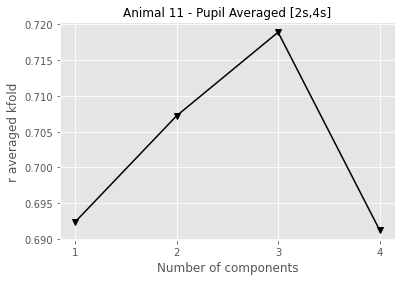

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


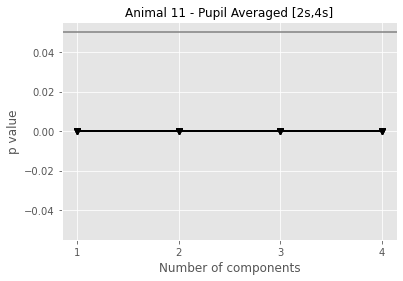

1
2
3
4


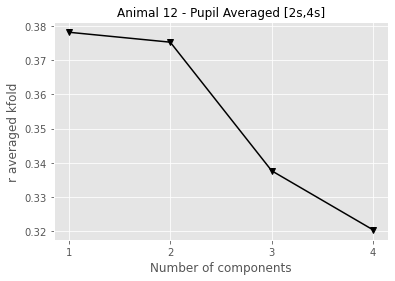

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4


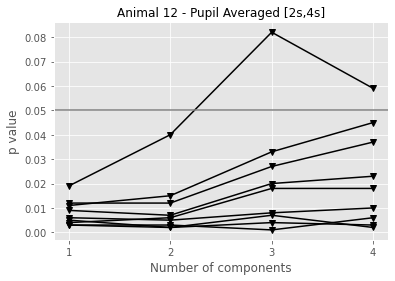

In [15]:
#Pupil PLSR - one value per trial, averaged in time window
n_comp_max = 4 #8
n_permutations = 1000
k = 4
import matplotlib.pyplot as plt
for animall in [11,12]:
    for typee in ["none"]: #,",normalized"
        for (start,stop) in [(35,45)]: #(25,30),(30,35),(35,40),(40,45),(45,50),(25,35),(30,40),(35,45),(40,50)
            for delay in [0]: #-1,-2,1,2,
                for typee in ["none"]: #,",normalized"
                    r,p,LX = PLSR_Pupil_Averaged(animall, typee, n_comp_max, k, n_permutations, start, stop, delay)
                    with plt.style.context(('ggplot')): 
                        plt.plot(range(1,n_comp_max+1), np.array(r), '-v', color = "black", label =  "delay " + str("{:.1f}".format(delay/fps)) +"s")  
                        plt.xlabel('Number of components')             
                        plt.ylabel('r averaged kfold')
            plt.xticks([1,2,3,4])
            #plt.legend(bbox_to_anchor=(1, 1))
            plt.title("Animal " + str(animall) + " - Pupil Averaged [2s,4s]")
            plt.savefig('presentation_pupilPLSR_r' + str(animall) + '.eps', format='eps')
            plt.show()

            for delay in [-8,-6,-4,-2,0,2,4,6,8]: #-1,-2,1,2,
                for typee in ["none"]: #,",normalized"
                    r,p,LX = PLSR_Pupil_Averaged(animall, typee, n_comp_max, k, n_permutations, start, stop, delay)
                    with plt.style.context(('ggplot')): 
                        plt.plot(range(1,n_comp_max+1), np.array(p), '-v', color = "black", label =  "delay " + str("{:.1f}".format(delay/fps)) + "s")  
                        plt.xlabel('Number of components')             
                        plt.ylabel('p value')
            plt.title("Animal " + str(animall) + " - Pupil Averaged [2s,4s]")
            plt.axhline(0.05, c = "gray")
            plt.xticks([1,2,3,4])
            #plt.legend(bbox_to_anchor=(1, 1))
            plt.savefig('presentation_pupilPLSR_p' + str(animall) + '.eps', format='eps')
            plt.show()
